# Import Libraries

In [5]:
from qiskit import BasicAer, IBMQ
from qiskit import QuantumCircuit, assemble, execute,ClassicalRegister
# import basic plot tools
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from random import choice
import io
import json
import base64
from qiskit.circuit import qpy_serialization
from qiskit.aqua.components.oracles import TruthTableOracle
import operator
import requests

# Demo: Get a custom oracle for Bernstein-Vazirani Algorithm

params:<br>
'qubits' : Number of qubits/Length of key bit-string.<br>
'measure' : Returns a measured circuit if passed with value "True".<br><br>
returns:<br>
'oracle': The circuit of the given oracle, in string format<br>
'key': the hidden key bit-string, for verifying correctness.<br>

In [6]:
URL = 'https://qulib-oracle.herokuapp.com/demo/get_BV_oracle'
p = {'qubits':'5','measure':'True'}
response = requests.get(URL,params=p) 
response.json()

{'oracle': 'UUlTS0lUAwATAQAAAAAAAAABAAlpAAgAAAAGAAAABQAAAAAAAAAEAAAAAgAAAAAAAAAWY2lyY3VpdC05AAAAAAAAAABudWxscQEAAAAGAAFxAAAAAAAAAAEAAAACAAAAAwAAAAQAAAAFYwEAAAAFAAFjAAAAAAAAAAEAAAACAAAAAwAAAAQAAAAAAAAAAAAFAAAAAAAAAAEAAAAAAAAAAAAAAAAAAABIR2F0ZXEAAAAAAAUAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAEhHYXRlcQAAAAEABQAAAAAAAAABAAAAAAAAAAAAAAAAAAAASEdhdGVxAAAAAgAFAAAAAAAAAAEAAAAAAAAAAAAAAAAAAABIR2F0ZXEAAAADAAUAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAEhHYXRlcQAAAAQABQAAAAAAAAABAAAAAAAAAAAAAAAAAAAAWEdhdGVxAAAABQAFAAAAAAAAAAEAAAAAAAAAAAAAAAAAAABIR2F0ZXEAAAAFAAcAAAAAAAAABgAAAAAAAAAAAAAAAAAAAEJhcnJpZXJxAAAAAHEAAAABcQAAAAJxAAAAA3EAAAAEcQAAAAUABgAAAAAAAAACAAAAAAAAAAAAAAAAAAAAQ1hHYXRlcQAAAAFxAAAABQAGAAAAAAAAAAIAAAAAAAAAAAAAAAAAAABDWEdhdGVxAAAAA3EAAAAFAAYAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAENYR2F0ZXEAAAAEcQAAAAUABwAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAQmFycmllcnEAAAAAcQAAAAFxAAAAAnEAAAADcQAAAARxAAAABQAFAAAAAAAAAAEAAAAAAAAAAAAAAAAAAABIR2F0ZXEAAAAAAAcAAAAAAAAAAQAAAAEAAAAAAAAAAAAAAE1lYXN1cmVxAAAAAGMAAAAAAAUAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAEhHYXRl

Custom function to convert string returned to Qiskit QuantumCircuit

In [7]:
def json_to_circuit(circuit_json):
    qpy_file = io.BytesIO(base64.b64decode(circuit_json))
    circuit = qpy_serialization.load(qpy_file)[0]
    return circuit

Visualisation of quantum circuit for the Oracle function.

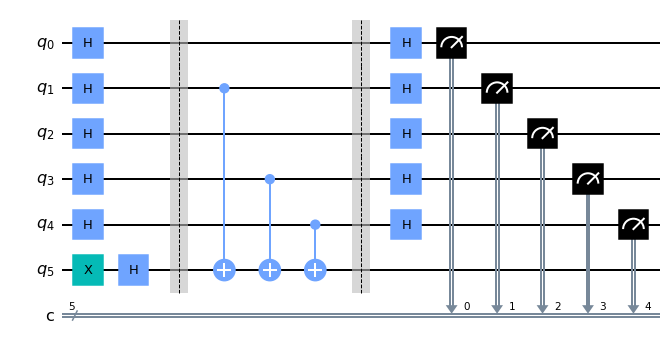

In [8]:
oracle = json_to_circuit(response.json()['oracle'])
key = response.json()['key']
oracle.draw(output='mpl')

# Demo: Get the key for a given oracle circuit using Bernstein-Vazirani Algorithm.

params:<br>
'oracle': QuantumCircuit for the oracle function, in string format.<br>
returns:<br>
'key': the binary key bit-string.<br>
Note: This function uses Qiskit's BasicAer simulator, which provides a noise free simulation.

In [9]:
key_URL = 'https://qulib-oracle.herokuapp.com/demo/get_BV_key'
p={'oracle':response.json()['oracle']}
response = requests.get(key_URL,params=p)
response.json()

{'key': '01011'}

# Apply Bernstein Vazirani Algorithm

<b>params:</b> <br>
'bitmap': Binary bitmap of oracle function, length should be in powers of 2.<br>
'api_key' : Unique API key for IBMQ Quantum Experience Account.<br>
returns:<br>
'key': The hidden key bit-string for the bitmap of given oracle function.



In [12]:
URL3 = 'https://qulib-oracle.herokuapp.com/BVazirani'
p3 = {'bitmap': '11101000', 'api_key':'dc2f533544c3bfa39230d244c7986dac6264ca6adbe570f3ce4f7d197d9c815d2ab9e36a5011182969bcce0a059654c59c80b401697bc6626916482a26bfdd8e'}
response = requests.get(URL3, params=p3)
response.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

# Demo: Get a custom oracle for Deutsch-Jozsa Algorithm
params:<br>
'n' : Number of qubits.<br>
'case': 'b' for balanced, 'c' for constant.<br>
'measure' : Returns a measured circuit if passed with value "True".<br>


returns:<br>
'oracle': The circuit of the given oracle, in string format.

In [3]:
URL = 'https://qulib-oracle.herokuapp.com/demo/get_oracle'
p = {'qubits':'5','case':'b','measure':'True'}
response = requests.get(URL,params=p) 
response.json()

NameError: name 'requests' is not defined

Visualisation of quantum circuit for the Oracle function.

In [ ]:
oracle = json_to_circuit(response.json()['oracle'])
oracle.draw(output='mpl')

# Demo: Get the type of a given oracle circuit using Deutsch-Jozsa Algorithm.

params:<br>
'circuit': QuantumCircuit for the oracle function, in string format.<br>
returns:<br>
'type': type of oracle function; <br>
Note: This function uses Qiskit's BasicAer simulator, which provides a noise free simulation.

In [ ]:
key_URL = 'https://qulib-oracle.herokuapp.com/demo/get_type'
p={'circuit':response.json()['oracle']}
response = requests.get(key_URL,params=p)
response.json()

# Apply Deutsch-Jozsa Algorithm
<b>params:</b> <br>
'bitmap': Binary bitmap of oracle function, length should be in powers of 2.<br>
'key' : Unique API key for IBMQ Quantum Experience Account.<br>
returns:<br>
'type': The type of Oracle function corresponding to given bitmap.



In [ ]:
type_URL = 'https://qulib-oracle.herokuapp.com/d_josza'
p={'circuit':response.json()['oracle']}
response = requests.get(key_URL,params=p)
response.json()